In [1318]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy
from kneed import KneeLocator
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn import utils

from sklearn.tree import export_graphviz
from IPython.display import Image  

from sklearn import preprocessing
from sklearn import utils

from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn import metrics, svm
from sklearn.linear_model           import LogisticRegression
from sklearn.tree                   import DecisionTreeClassifier
from sklearn.neighbors              import KNeighborsClassifier
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.naive_bayes            import GaussianNB
from sklearn.svm                    import SVC

from sklearn.metrics import d2_pinball_score
from sklearn.metrics import d2_tweedie_score
from sklearn.metrics import max_error

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import pydotplus

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import *
from sklearn import tree
from sklearn.cluster import MeanShift

from sklearn.metrics import confusion_matrix, precision_score 
# import graphviz


In [1272]:
df = pd.read_csv('internetSpeed_Indonesia - 2020.csv')
df = df.dropna()
df.head(10)

,Year,Location,Download,Upload,UMR,PersentasePenggunaInternet,JumlahPenduduk
0,2020,Aceh,10.2,4.8,2916810,71.97,5388100
1,2020,Bali,11.6,6.9,2297969,85.67,4414400
2,2020,Bangka Belitung,10.6,4.5,2976706,78.35,1469800
3,2020,Banten,10.4,4.9,2267990,84.07,12895300
4,2020,Bengkulu,9.5,4.4,2040407,71.69,1994300
5,2020,Jawa Tengah,9.6,5.1,1605396,79.66,34738200
6,2020,Kalimantan Tengah,11.0,7.1,2663435,76.57,2686300
7,2020,Sulawesi Tengah,13.6,4.8,2123040,68.70,3081700
8,2020,Jawa Timur,11.3,5.5,1630059,77.21,39955900
9,2020,Kalimantan Timur,13.2,7.0,2747561,86.87,3664700


In [1273]:
df2 = pd.read_csv('internetSpeed_Indonesia - 2021.csv')
df2 = df2.dropna()
df2.head(10)

,Year,Location,Download,Upload,UMR,PersentasePenggunaInternet,JumlahPenduduk
0,2021,Aceh,20.59,5.31,3160000,75.54,5334000
1,2021,Bali,24.71,16.98,2494000,87.80,4363000
2,2021,Bangka Belitung,19.17,7.02,3230023,82.89,1473000
3,2021,Banten,21.30,8.08,4230792,87.45,12061000
4,2021,Bengkulu,17.74,4.77,2215000,78.03,2033000
5,2021,Jawa Tengah,17.55,6.45,1813011,82.88,36743000
6,2021,Kalimantan Tengah,20.31,6.64,2903144,80.27,2702000
7,2021,Sulawesi Tengah,16.76,4.64,2303711,76.51,3022000
8,2021,Jawa Timur,17.05,6.53,1868777,79.66,40879000
9,2021,Kalimantan Timur,20.14,6.43,2981378,89.67,3808000


In [1274]:
df3 = pd.read_csv('internetSpeed_Indonesia - 2022.csv')
df3 = df3.dropna()
df3.head(35)

,Year,Location,Download,Upload,UMR,PersentasePenggunaInternet,JumlahPenduduk
0,2022,Aceh,22.56,9.42,3116460,80.83,5380000
1,2022,Bali,29.46,24.54,2516971,93.95,4290000
2,2022,Bangka Belitung,21.76,13.58,3264884,88.69,1470000
3,2022,Banten,26.34,11.65,2501203,93.57,12150000
4,2022,Bengkulu,19.25,9.08,2238094,83.49,2050000
5,2022,Jawa Tengah,17.98,9.50,1812935,88.68,37490000
6,2022,Kalimantan Tengah,22.64,10.15,2922516,85.89,2670000
7,2022,Sulawesi Tengah,19.32,9.58,2390739,81.87,3070000
8,2022,Jawa Timur,18.83,8.77,1891567,85.24,41140000
9,2022,Kalimantan Timur,22.18,10.23,3014497,95.95,3890000


In [1275]:
x = df.iloc[:,[3,4]]
x = x.values.tolist()
x = numpy.array(x)
print(x[0])

[4.80000e+00 2.91681e+06]


In [1276]:
x2 = df2.iloc[:,[3,4]]
x2 = x2.values.tolist()
x2 = numpy.array(x2)
print(x2[0])

[5.31e+00 3.16e+06]


In [1277]:
x3 = df3.iloc[:,[3,4]]
x3 = x3.values.tolist()
x3 = numpy.array(x3)
print(x3[0])

[9.42000e+00 3.11646e+06]


In [1278]:
dfc = df.iloc[:,[2,3,4]]
dfc = dfc.values.tolist()

dfc2 = df2.iloc[:,[2,3,4]]
dfc2 = dfc2.values.tolist()

dfc3 = df3.iloc[:,[2,3,4]]
dfc3 = dfc3.values.tolist()

x = x.tolist()
x2 = x2.tolist()
x3 = x3.tolist()

for i in range (34):
    x[i][0] = round(((float(dfc[i][1]) + float(dfc[i][0])))/2,2)
    x2[i][0] = round(((float(dfc2[i][1]) + float(dfc2[i][0])))/2,2)
    x3[i][0] = round(((float(dfc3[i][1]) + float(dfc3[i][0])))/2,2)

x = numpy.array(x)
x2 = numpy.array(x2)
x3 = numpy.array(x3)

print(x)

[[7.500000e+00 2.916810e+06]
 [9.250000e+00 2.297969e+06]
 [7.550000e+00 2.976706e+06]
 [7.650000e+00 2.267990e+06]
 [6.950000e+00 2.040407e+06]
 [7.350000e+00 1.605396e+06]
 [9.050000e+00 2.663435e+06]
 [9.200000e+00 2.123040e+06]
 [8.400000e+00 1.630059e+06]
 [1.010000e+01 2.747561e+06]
 [1.050000e+01 1.795000e+06]
 [7.950000e+00 2.384020e+06]
 [7.500000e+00 3.940973e+06]
 [7.550000e+00 2.423889e+06]
 [7.750000e+00 2.241270e+06]
 [1.145000e+01 2.400664e+06]
 [1.040000e+01 2.765463e+06]
 [7.750000e+00 2.508091e+06]
 [8.250000e+00 3.051076e+06]
 [1.145000e+01 3.240900e+06]
 [9.450000e+00 2.662026e+06]
 [7.550000e+00 2.769754e+06]
 [9.100000e+00 2.351870e+06]
 [8.400000e+00 2.651782e+06]
 [7.750000e+00 2.860382e+06]
 [8.050000e+00 1.570923e+06]
 [7.750000e+00 1.668373e+06]
 [8.300000e+00 2.211500e+06]
 [9.550000e+00 2.012610e+06]
 [1.275000e+01 2.934500e+06]
 [8.350000e+00 2.381000e+06]
 [6.950000e+00 2.289220e+06]
 [8.350000e+00 2.860382e+06]
 [8.960000e+00 2.303403e+06]]


In [1279]:
print(x2)

[[1.295000e+01 3.160000e+06]
 [2.084000e+01 2.494000e+06]
 [1.310000e+01 3.230023e+06]
 [1.469000e+01 4.230792e+06]
 [1.125000e+01 2.215000e+06]
 [1.200000e+01 1.813011e+06]
 [1.347000e+01 2.903144e+06]
 [1.070000e+01 2.303711e+06]
 [1.179000e+01 1.868777e+06]
 [1.329000e+01 2.981378e+06]
 [1.262000e+01 1.950000e+06]
 [1.154000e+01 2.586900e+06]
 [1.875000e+01 4.416186e+06]
 [1.223000e+01 2.630162e+06]
 [1.152000e+01 2.400000e+06]
 [1.154000e+01 2.604961e+06]
 [1.308000e+01 3.000803e+06]
 [1.234000e+01 2.721530e+06]
 [1.251000e+01 3.310721e+06]
 [1.288000e+01 3.516700e+06]
 [1.181000e+01 2.888563e+06]
 [1.379000e+01 3.005383e+06]
 [1.177000e+01 2.552014e+06]
 [1.363000e+01 2.903144e+06]
 [1.396000e+01 3.043111e+06]
 [1.270000e+01 1.765608e+06]
 [1.430000e+01 1.810351e+06]
 [1.304000e+01 2.399698e+06]
 [1.198000e+01 2.183883e+06]
 [1.198000e+01 3.134600e+06]
 [1.156000e+01 2.571328e+06]
 [1.354000e+01 2.484041e+06]
 [1.294000e+01 3.165876e+06]
 [1.389000e+01 2.499422e+06]]


In [1280]:
print(x3)

[[1.599000e+01 3.116460e+06]
 [2.700000e+01 2.516971e+06]
 [1.767000e+01 3.264884e+06]
 [1.900000e+01 2.501203e+06]
 [1.416000e+01 2.238094e+06]
 [1.374000e+01 1.812935e+06]
 [1.639000e+01 2.922516e+06]
 [1.445000e+01 2.390739e+06]
 [1.380000e+01 1.891567e+06]
 [1.620000e+01 3.014497e+06]
 [1.604000e+01 1.975000e+06]
 [1.405000e+01 2.800580e+06]
 [2.320000e+01 4.641854e+06]
 [1.479000e+01 2.698940e+06]
 [1.355000e+01 2.440486e+06]
 [1.478000e+01 2.619312e+06]
 [1.561000e+01 3.016738e+06]
 [1.804000e+01 2.862231e+06]
 [1.234000e+01 3.310723e+06]
 [1.598000e+01 3.561932e+06]
 [1.477000e+01 2.938564e+06]
 [1.516000e+01 3.050172e+06]
 [1.380000e+01 2.576016e+06]
 [1.706000e+01 2.906473e+06]
 [1.748000e+01 3.144446e+06]
 [1.463000e+01 1.840915e+06]
 [1.823000e+01 1.841487e+06]
 [1.646000e+01 2.434328e+06]
 [1.358000e+01 2.207212e+06]
 [1.491000e+01 3.200000e+06]
 [1.326000e+01 2.678863e+06]
 [1.536000e+01 2.512539e+06]
 [1.589000e+01 3.165876e+06]
 [1.286000e+01 2.522609e+06]]


In [1281]:
km = KMeans (n_clusters= 3,
init = 'random', n_init= 10, 
max_iter= 300, tol= 0.01, random_state=0 
)

In [1282]:
distortions = []
for i in range(1, 35):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x) 
    distortions.append(km.inertia_)

kl = KneeLocator(range(1, 35), distortions, curve="convex", direction="decreasing")
kl.elbow

5

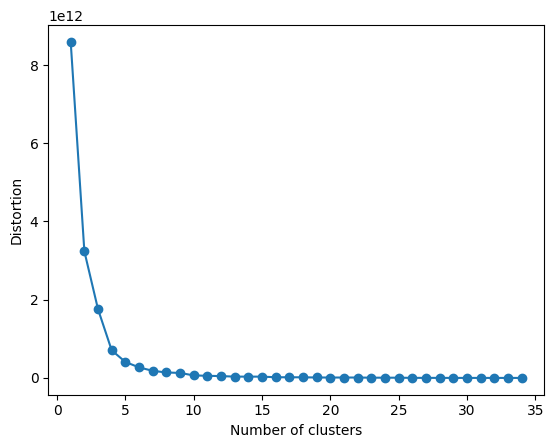

In [1283]:
plt.plot(range(1, 35), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [1284]:
km = KMeans (n_clusters= kl.elbow,
init = 'random', n_init= 5, 
max_iter= 3001, tol= 0.01, random_state=0 
)

In [1327]:
y_km = km.fit_predict(x)
print(y_km)

clustering = MeanShift(bandwidth= 5)
print(clustering.fit(x))

[1 2 1 2 3 3 4 2 3 4 3 2 0 2 2 2 4 2 1 1 4 4 2 4 1 3 3 2 3 1 2 2 1 2]
MeanShift(bandwidth=5)


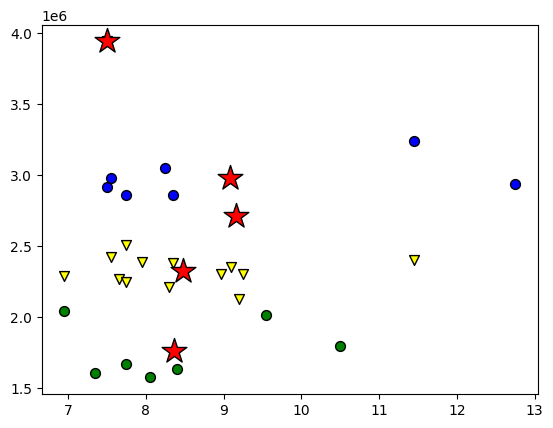

In [1286]:
plt.scatter( #2020
    x[y_km == 0, 0], x[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='v', edgecolor='black',
    label='c1'
)

plt.scatter(
    x[y_km == 1, 0], x[y_km == 1, 1],
    s=50, c='blue',
    marker='o', edgecolor='black',
    label='c2'
)

plt.scatter(
    x[y_km == 2, 0], x[y_km == 2, 1],
    s=50, c='yellow',
    marker='v', edgecolor='black',
    label='c3'
)

plt.scatter(
    x[y_km == 3, 0], x[y_km == 3, 1],
    s=50, c='green',
    marker='o', edgecolor='black',
    label='c4'
)

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=350, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

In [1287]:
distortions = []
for i in range(1,35):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x2) 
    distortions.append(km.inertia_)

kl = KneeLocator(range(1,35), distortions, curve="convex", direction="decreasing")
kl.elbow

4

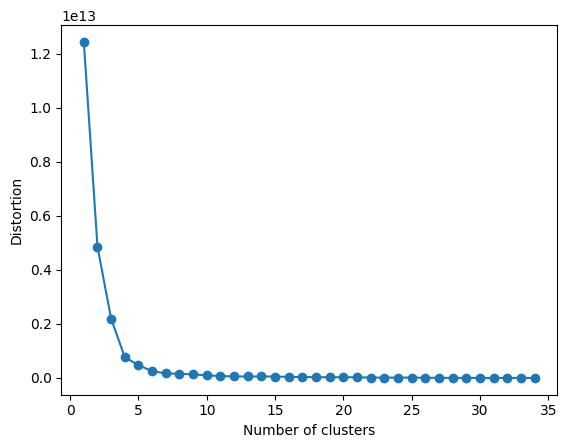

In [1288]:
plt.plot(range(1,35), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [1289]:
km = KMeans (n_clusters= kl.elbow,
init = 'random', n_init= 5, 
max_iter= 3001, tol= 0.01, random_state=0 
)

In [1290]:
y_km2 = km.fit_predict(x2)
print(y_km2)

[3 0 3 1 0 2 3 0 2 3 2 0 1 0 0 0 3 0 3 3 3 3 0 3 3 2 2 0 0 3 0 0 3 0]


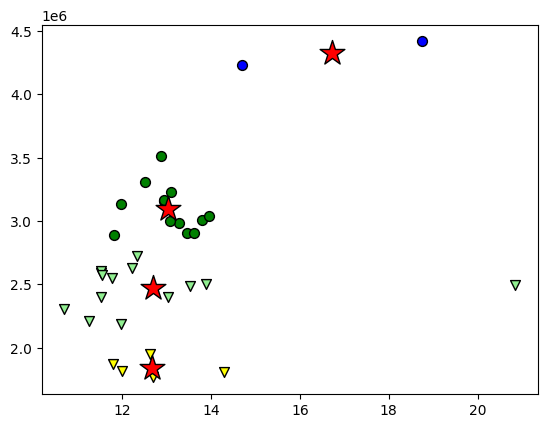

In [1291]:
plt.scatter( #2021
    x2[y_km2 == 0, 0], x2[y_km2 == 0, 1],
    s=50, c='lightgreen',
    marker='v', edgecolor='black',
    label='c1'
)

plt.scatter(
    x2[y_km2 == 1, 0], x2[y_km2 == 1, 1],
    s=50, c='blue',
    marker='o', edgecolor='black',
    label='c2'
)

plt.scatter(
    x2[y_km2 == 2, 0], x2[y_km2 == 2, 1],
    s=50, c='yellow',
    marker='v', edgecolor='black',
    label='c3'
)

plt.scatter(
    x2[y_km2 == 3, 0], x2[y_km2 == 3, 1],
    s=50, c='green',
    marker='o', edgecolor='black',
    label='c4'
)

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=350, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

In [1292]:
distortions = []
for i in range(1, 35):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x3) 
    distortions.append(km.inertia_)

kl = KneeLocator(range(1, 35), distortions, curve="convex", direction="decreasing")
kl.elbow

5

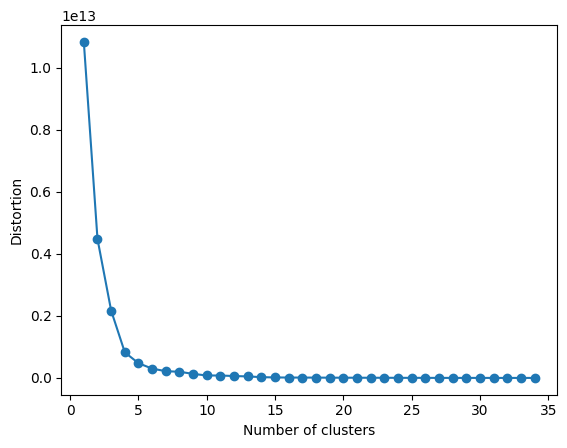

In [1293]:
plt.plot(range(1, 35), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [1294]:
km = KMeans (n_clusters= kl.elbow,
init = 'random', n_init= 5, 
max_iter= 3001, tol= 0.01, random_state=0 
)

In [1295]:
y_km3 = km.fit_predict(x3)
print(y_km3)

[1 0 1 0 2 2 3 0 2 3 2 3 4 0 0 0 3 3 1 1 3 3 0 3 1 2 2 0 2 1 0 0 1 0]


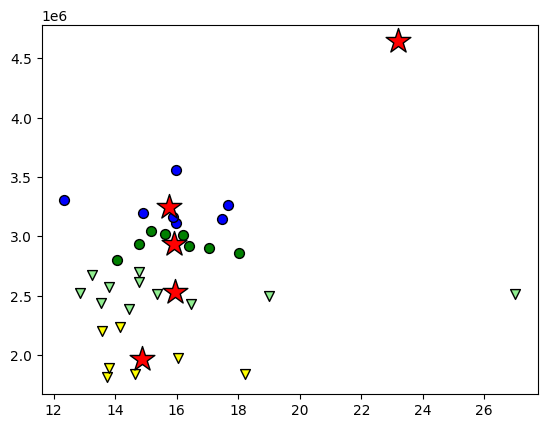

In [1296]:
plt.scatter(
    x3[y_km3 == 0, 0], x3[y_km3 == 0, 1],
    s=50, c='lightgreen',
    marker='v', edgecolor='black',
    label='c1'
)

plt.scatter(
    x3[y_km3 == 1, 0], x3[y_km3 == 1, 1],
    s=50, c='blue',
    marker='o', edgecolor='black',
    label='c2'
)

plt.scatter(
    x3[y_km3 == 2, 0], x3[y_km3 == 2, 1],
    s=50, c='yellow',
    marker='v', edgecolor='black',
    label='c3'
)

plt.scatter(
    x3[y_km3 == 3, 0], x3[y_km3 == 3, 1],
    s=50, c='green',
    marker='o', edgecolor='black',
    label='c4'
)

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=350, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

In [1297]:
#From the 3 cluster from year 2020 until 2022, we can conclude that 

In [1298]:
df['Download'].replace(['YES', 'NO'], [1,0], inplace=True)
df3.head(5)

dfctemp = dfc3
for i in range (len(dfc3)):
    dfctemp[i] = dfc3[i][0]

print (max(dfctemp))

29.46


In [1299]:
dfmerge = [df,df2,df3]
result = pd.concat(dfmerge,axis= 0)

result = pd.read_csv('merge.csv')
result.head(95)

lab = preprocessing.LabelEncoder()
result['Year'] = lab.fit_transform(result['Year'].values) 
result['Download'] = lab.fit_transform(result['Download'].values) 
result['UMR'] = lab.fit_transform(result['UMR'].values) 
result['PersentasePenggunaInternet'] = lab.fit_transform(result['PersentasePenggunaInternet'].values) 
result['JumlahPenduduk'] = lab.fit_transform(result['JumlahPenduduk'].values) 

result

,Year,Location,Download,Upload,UMR,PersentasePenggunaInternet,JumlahPenduduk
0,0,Aceh,4,4.80,69,13,62
1,0,Bali,12,6.90,26,64,56
2,0,Bangka Belitung,7,4.50,73,34,15
3,0,Banten,5,4.90,24,60,89
4,0,Bengkulu,1,4.40,16,12,21
...,...,...,...,...,...,...,...
97,2,Papua Barat,62,9.69,87,39,5
98,2,Sulawesi Barat,35,8.49,57,42,14
99,2,Sumatera Barat,73,8.87,44,80,71
100,2,Sulawesi Selatan,69,10.41,86,81,83


In [1300]:
result.describe()

,Year,Download,Upload,UMR,PersentasePenggunaInternet,JumlahPenduduk
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,1.000000,40.735294,7.580392,49.686275,49.500000,50.500000
std,0.820529,26.357754,3.147838,28.618342,28.753906,29.588849
min,0.000000,0.000000,4.230000,0.000000,0.000000,0.000000
25%,0.000000,17.000000,5.302500,25.250000,25.250000,25.250000
50%,1.000000,39.000000,6.515000,50.500000,49.500000,50.500000
75%,2.000000,62.750000,9.500000,73.750000,73.750000,75.750000
max,2.000000,88.000000,24.540000,98.000000,99.000000,101.000000


In [1301]:
result1 = result.iloc[:]
result2 = 0

classify_average = (result["Download"].mean())

result["InternetSpeed"] = (result["Download"]+result["Upload"])/2

result["Below_average"] = (result["InternetSpeed"] < 10)

for i in range (0,95):
    result["Below_average"][i] = int(result["Below_average"][i])

result.head(95)

C:\Users\Asus\AppData\Local\Temp\ipykernel_42864\3455238342.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["Below_average"][i] = int(result["Below_average"][i])
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Year,Location,Download,Upload,UMR,PersentasePenggunaInternet,JumlahPenduduk,InternetSpeed,Below_average
0,0,Aceh,4,4.80,69,13,62,4.400,1
1,0,Bali,12,6.90,26,64,56,9.450,1
2,0,Bangka Belitung,7,4.50,73,34,15,5.750,1
3,0,Banten,5,4.90,24,60,89,4.950,1
4,0,Bengkulu,1,4.40,16,12,21,2.700,1
...,...,...,...,...,...,...,...,...,...
90,2,Sulawesi Tenggara,38,9.03,49,77,33,23.515,0
91,2,Kalimantan Selatan,80,10.40,68,84,50,45.200,0
92,2,Sumatera Selatan,81,10.99,84,71,78,45.995,0
93,2,DIY Yogyakarta,52,9.80,9,90,44,30.900,0


In [1302]:
feature_cols = ["Year","UMR","PersentasePenggunaInternet","JumlahPenduduk"]


#Classify predict city below average
X = result[feature_cols] # Features
print(X.head())
y = result.Below_average # Target variable
print(y.head())

y = lab.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=100) # 50% training and 50% test
# y_train= lab.fit_transform(y_train)

   Year  UMR  PersentasePenggunaInternet  JumlahPenduduk
0     0   69                          13              62
1     0   26                          64              56
2     0   73                          34              15
3     0   24                          60              89
4     0   16                          12              21
0    1
1    1
2    1
3    1
4    1
Name: Below_average, dtype: object


In [1303]:
clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
# y_pred= lab.fit_transform(y_pred)
print("Prediction Result:",y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred, pos_label='positive',average='micro'))
print("Precision score:",metrics.precision_score(y_test, y_pred, pos_label='positive',average='micro'))

Prediction Result: [0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
Accuracy: 0.8431372549019608
F1 score: 0.8431372549019607
Precision score: 0.8431372549019608


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [1304]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- feature_2 <= 5.50
|   |   |--- class: 0
|   |--- feature_2 >  5.50
|   |   |--- feature_2 <= 67.00
|   |   |   |--- feature_2 <= 9.50
|   |   |   |   |--- feature_1 <= 23.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  23.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  9.50
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  67.00
|   |   |   |--- class: 0
|--- feature_0 >  0.50
|   |--- class: 0



In [1305]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        39
           1       0.64      0.75      0.69        12

    accuracy                           0.84        51
   macro avg       0.78      0.81      0.79        51
weighted avg       0.85      0.84      0.85        51



In [1306]:
clf = svm.SVR()
clf = clf.fit(X_train,y_train)
print("SVM")
y_pred = clf.predict(X_test)
y_pred = lab.fit_transform(y_pred)

print("Prediction Result:",y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred, pos_label='positive',average='micro'))
print("Precision score:",metrics.precision_score(y_test, y_pred, pos_label='positive',average='micro'))

SVM
Prediction Result: [ 0 19 42 21  7 16 34 50 45 20 18 32 36  6  2 37  5 47 35 31 24 25 23  9
 41 38 40 14 26 28 44 43 13  3  4 30 12 27 17 46 29 15 11 33 48 10  1 39
  8 22 49]
Accuracy: 0.0196078431372549
F1 score: 0.0196078431372549
Precision score: 0.0196078431372549


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [1307]:
clf = KNeighborsClassifier()
clf = clf.fit(X_train,y_train)
print("Kneighbors")
y_pred = clf.predict(X_test)

print("Prediction Result:",y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred, pos_label='positive',average='micro'))
print("Precision score:",metrics.precision_score(y_test, y_pred, pos_label='positive',average='micro'))

Kneighbors
Prediction Result: [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
Accuracy: 0.6862745098039216
F1 score: 0.6862745098039216
Precision score: 0.6862745098039216


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [1308]:
clf = LinearDiscriminantAnalysis()
clf = clf.fit(X_train,y_train)
print("LinearRegression")
y_pred = clf.predict(X_test)
y_pred= lab.fit_transform(y_pred)

print("Prediction Result:",y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred, pos_label='positive',average='micro'))
print("Precision score:",metrics.precision_score(y_test, y_pred, pos_label='positive',average='micro'))

LinearRegression
Prediction Result: [0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1]
Accuracy: 0.9215686274509803
F1 score: 0.9215686274509803
Precision score: 0.9215686274509803


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [1309]:
clf = GaussianNB()
clf = clf.fit(X_train,y_train)
print("GaussianNB")
y_pred = clf.predict(X_test)

print("Prediction Result:",y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred, pos_label='positive',average='micro'))
print("Precision score:",metrics.precision_score(y_test, y_pred, pos_label='positive',average='micro'))

GaussianNB
Prediction Result: [0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1]
Accuracy: 0.8627450980392157
F1 score: 0.8627450980392157
Precision score: 0.8627450980392157


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [1310]:
clf = SVC()
clf = clf.fit(X_train,y_train)
print("LinearRegression")
y_pred = clf.predict(X_test)

print("Prediction Result:",y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred, pos_label='positive',average='micro'))
print("Precision score:",metrics.precision_score(y_test, y_pred, pos_label='positive',average='micro'))

LinearRegression
Prediction Result: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy: 0.7647058823529411
F1 score: 0.7647058823529412
Precision score: 0.7647058823529411


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [1311]:
#Regression predict
X = result[feature_cols] # Features
print(X.head())
y = result.InternetSpeed # Target variable
print(y.head())

y = lab.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=100) # 50% training and 50% test
# y_train= lab.fit_transform(y_train)

   Year  UMR  PersentasePenggunaInternet  JumlahPenduduk
0     0   69                          13              62
1     0   26                          64              56
2     0   73                          34              15
3     0   24                          60              89
4     0   16                          12              21
0    4.40
1    9.45
2    5.75
3    4.95
4    2.70
Name: InternetSpeed, dtype: float64


In [1312]:
clf = DecisionTreeRegressor()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Prediction Result:",y_pred)

# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# print("F1 score:",metrics.f1_score(y_test, y_pred, pos_label='positive',average='micro'))
# print("Precision score:",metrics.precision_score(y_test, y_pred, pos_label='positive',average='micro'))

print("\n        Accuracy score")
print("R2 Score :",metrics.r2_score(y_test, y_pred))
print("MSE Score :",numpy.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Pinball Score :",metrics.d2_pinball_score(y_test, y_pred ))
print("Tweedie Score :",metrics.d2_tweedie_score(y_test, y_pred ))
print("Max Error:",metrics.max_error(y_test, y_pred ))

Prediction Result: [65. 48. 20. 67. 78. 20. 50.  8. 66. 28. 48. 41. 38. 79. 94. 55. 40. 20.
 44. 10.  3. 55. 55. 54. 11.  0. 18. 54. 55. 18. 16.  3. 20. 28. 64. 50.
 90. 55. 48. 56. 45. 76. 94. 55. 66. 67. 90. 39. 31. 55.  3.]

        Accuracy score
R2 Score : 0.4498807761416672
MSE Score : 22.059189539447157
Pinball Score : 0.32071269487750553
Tweedie Score : 0.4498807761416672
Max Error: 57.0


In [1313]:
plt.figure(figsize=(200,100), facecolor ='c')

a = tree.plot_tree(clf,

                   feature_names = feature_cols,

                   class_names = y,

                   rounded = True,

                   filled = True,

                   fontsize=20)

plt.show()

In [1314]:
clf = LinearRegression()
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred= lab.fit_transform(y_pred)
print("Prediction Result:",y_pred)

# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# print("F1 score:",metrics.f1_score(y_test, y_pred, pos_label='positive',average='micro'))
# print("Precision score:",metrics.precision_score(y_test, y_pred, pos_label='positive',average='micro'))

print("\n        Accuracy score")
print("R2 Score :",metrics.r2_score(y_test, y_pred))
print("MSE Score :",numpy.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Pinball Score :",metrics.d2_pinball_score(y_test, y_pred ))
print("Tweedie Score :",metrics.d2_tweedie_score(y_test, y_pred ))
print("Max Error:",metrics.max_error(y_test, y_pred ))

Prediction Result: [37 46 10 29 23  2 24 11 34  7 31 18 16 45 50 36 41  8 17  0  4 35 33 27
  5  3  9 26 30 14 15  6 12 21 28 20 48 42 38 19 22 44 39 32 25 47 49  1
 40 43 13]

        Accuracy score
R2 Score : -0.15421516972557248
MSE Score : 31.952476966797512
Pinball Score : 0.01187824795842607
Tweedie Score : -0.15421516972557248
Max Error: 72


In [1315]:
clf = svm.SVR()
clf = clf.fit(X_train,y_train)
print("SVM")
y_pred = clf.predict(X_test)
y_pred= lab.fit_transform(y_pred)
print("Prediction Result:",y_pred)

print("\n        Accuracy score")
print("R2 Score :",metrics.r2_score(y_test, y_pred))
print("MSE Score :",numpy.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Pinball Score :",metrics.d2_pinball_score(y_test, y_pred ))
print("Tweedie Score :",metrics.d2_tweedie_score(y_test, y_pred ))
print("Max Error:",metrics.max_error(y_test, y_pred ))

SVM
Prediction Result: [50 41 23 24 35 15 27 14  8 37 13  7  5 44 48 18 30 17  3  2 10 31 16 45
  4  1 20 38 12 32 34 11 28 49 47 26 42 36 33  6 21 25 40  9 19 46 43  0
 29 39 22]

        Accuracy score
R2 Score : -0.5518030489665384
MSE Score : 37.049251798430824
Pinball Score : -0.20638455827765423
Tweedie Score : -0.5518030489665386
Max Error: 82


In [1316]:
clf = LogisticRegression()
clf = clf.fit(X_train,y_train)
print("LogisticRegression")
y_pred = clf.predict(X_test)
y_pred= lab.fit_transform(y_pred)

print("Prediction Result:",y_pred)

print("\n        Accuracy score")
print("R2 Score :",metrics.r2_score(y_test, y_pred))
print("MSE Score :",numpy.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Pinball Score :",metrics.d2_pinball_score(y_test, y_pred ))
print("Tweedie Score :",metrics.d2_tweedie_score(y_test, y_pred ))
print("Max Error:",metrics.max_error(y_test, y_pred ))

LogisticRegression
Prediction Result: [28 15 24 13 11 13 12  1  1 18 11 14 19 23 27  3 30  4 26 12 14  7 15  6
 20  0 22 16 12  0  2  5  8 29 26  7 22 12 15  1 17 10 21 14  4  6 25  9
 25 18  2]

        Accuracy score
R2 Score : -1.3574416463758645
MSE Score : 45.664806030508025
Pinball Score : -0.41722345953971796
Tweedie Score : -1.357441646375865
Max Error: 84


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1317]:
clf = MLPRegressor()
clf = clf.fit(X_train,y_train)
print("LogisticRegression")
y_pred = clf.predict(X_test)
y_pred= lab.fit_transform(y_pred)

print("Prediction Result:",y_pred)

print("\n        Accuracy score")
print("R2 Score :",metrics.r2_score(y_test, y_pred))
print("MSE Score :",numpy.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Pinball Score :",metrics.d2_pinball_score(y_test, y_pred))
print("Tweedie Score :",metrics.d2_tweedie_score(y_test, y_pred ))
print("Max Error:",metrics.max_error(y_test, y_pred ))

LogisticRegression
Prediction Result: [49 39 24 27 37 15 25 14  8 31 17  6  3 44 48 18 41 16  7  0 10 30 13 43
  2  4 19 34 11 29 26 12 32 50 45 23 38 35 28  5 21 36 42  9 22 47 46  1
 33 40 20]

        Accuracy score
R2 Score : -0.5461282888703249
MSE Score : 36.98144738893264
Pinball Score : -0.18262806236080187
Tweedie Score : -0.5461282888703249
Max Error: 82


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
